# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive #mounting Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',sep=',',encoding="unicode_escape")

In [ ]:
#manipulating the display of Dataset
pd.set_option('display.max_rows',10) #here displaying max rows 10
pd.set_option('display.max_columns', 100) #here displaying max columns 100

**Understanding the Data**

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.size

122640

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no null values in the dataset

In [ ]:
#converting the date column into datetime feature
import datetime

In [ ]:
df['Date']= pd.to_datetime(df.Date)

In [ ]:
#Extracting important features from Date
def date(df):
  df["Day"]= df["Date"].dt.dayofweek #Day of Week
  df["Day_of_year"]= df['Date'].dt.dayofyear #Day of Year
  df["Day_of_month"]= df['Date'].dt.day #Day of Month
  df['year']= df['Date'].dt.year #Year
  df["month"]= df['Date'].dt.month #Month
  df['quarter']= df['Date'].dt.quarter #Quarter
  df['is weekend?']= df['Day'].apply(lambda x: 0 if x in range(0,5) else 1) #whether it is a weekend or not
  return df

In [ ]:
df_new= date(df) #applying the above created function to the dataframe

In [ ]:
df_new.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Day_of_year,Day_of_month,year,month,quarter,is weekend?
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,12,12,2017,1,1,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,12,12,2017,1,1,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,12,12,2017,1,1,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,12,12,2017,1,1,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,12,12,2017,1,1,0


# Exploratory Data Analysis(EDA)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


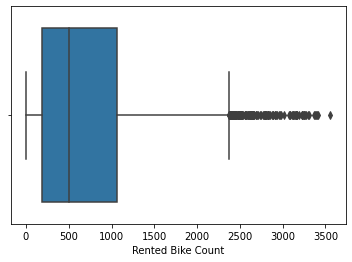

In [ ]:
#boxplot for dependent variable
sns.boxplot(df_new['Rented Bike Count'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


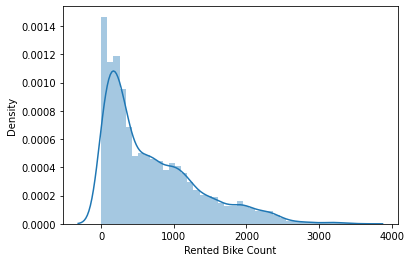

In [ ]:
sns.distplot(df_new['Rented Bike Count'], hist=True, kde=True) 

**Date**

In [ ]:
#Count of Bikes rented each date
df_new.groupby('Date')["Rented Bike Count"].sum()

Date
2017-01-12     9539
2017-02-12     8523
2017-03-12     7222
2017-04-12     8729
2017-05-12     8307
              ...  
2018-12-07    29428
2018-12-08    17498
2018-12-09    31809
2018-12-10    26237
2018-12-11    21003
Name: Rented Bike Count, Length: 365, dtype: int64

Text(0, 0.5, 'Rented Bike Count')

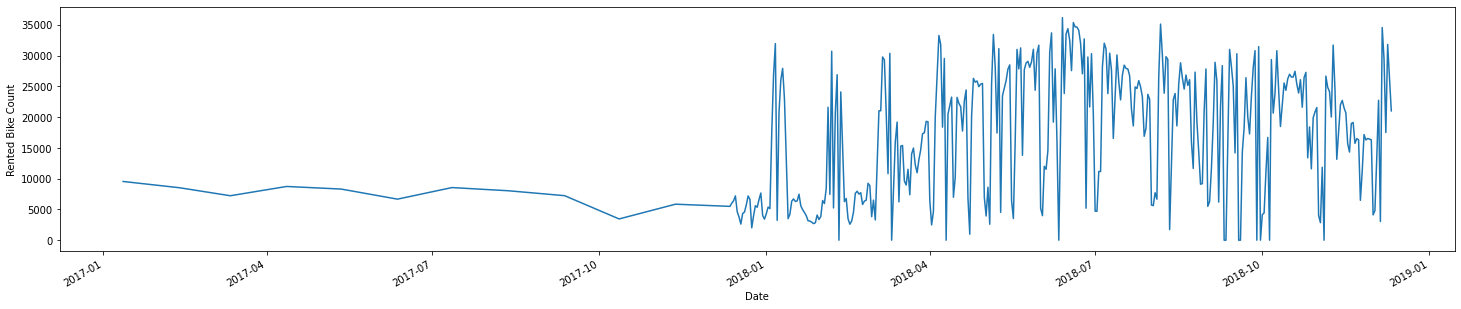

In [ ]:
#lineplot of Bike counts vs Date
plt.figure(figsize=(25,5))
df_new.groupby('Date')["Rented Bike Count"].sum().plot.line()
plt.ylabel('Rented Bike Count')

**Hour**

In [ ]:
#Bike counts everyhour of the day
df_new.groupby('Hour')['Rented Bike Count'].sum()

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64

Text(0, 0.5, 'Rented Bike Count')

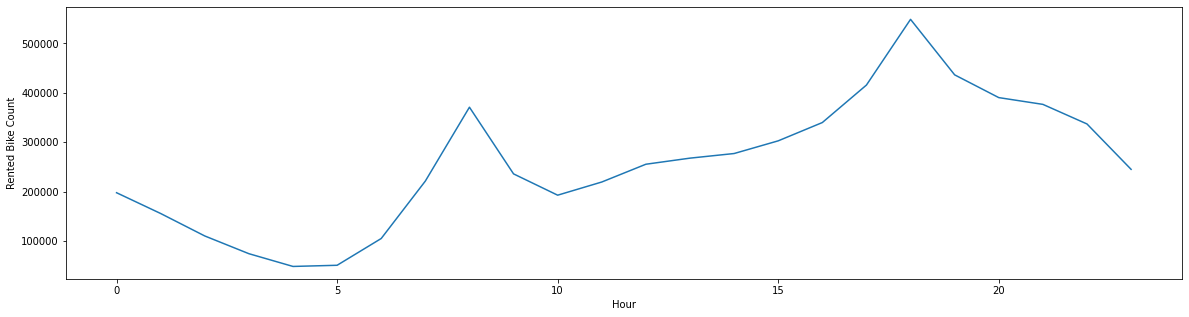

In [ ]:
#lineplot of Bike counts vs Hour 
plt.figure(figsize=(20,5))
df_new.groupby('Hour')['Rented Bike Count'].sum().plot.line()
plt.ylabel('Rented Bike Count')

**Temperature**

In [ ]:
df_new.groupby('Temperature(°C)')['Rented Bike Count'].sum()

Temperature(°C)
-17.8     322
-17.5     291
-17.4      64
-16.9      36
-16.5      96
         ... 
 38.0    1184
 38.7     475
 39.0    1033
 39.3     531
 39.4     561
Name: Rented Bike Count, Length: 546, dtype: int64

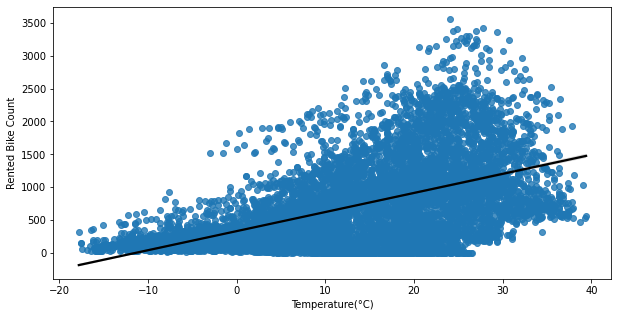

In [ ]:
#creating a regplot depicting the demand of bikes vs Temperature
plt.figure(figsize=(10,5))
sns.regplot(x = "Temperature(°C)", y = "Rented Bike Count",data = df_new,line_kws={"color": "black"})

Text(0, 0.5, 'Rented Bike Count')

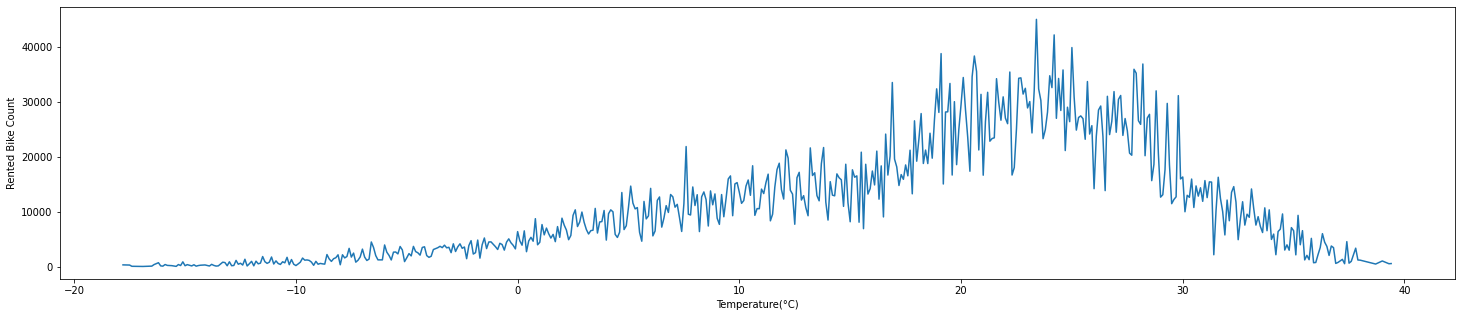

In [ ]:
#creating a lineplot depicting the demand of bikes vs Temperature
plt.figure(figsize=(25,5))
df_new.groupby('Temperature(°C)')['Rented Bike Count'].sum().plot.line()
plt.ylabel('Rented Bike Count')


The Demand for bikes increases with the increase in Temperature and peaks at nearby 25°C then it drops sharply with increase in Temperature 

**Humidity**

In [ ]:
df_new.groupby('Humidity(%)')['Rented Bike Count'].sum()

Humidity(%)
0      6930
10     1315
11     1986
12     2032
13     4353
      ...  
94    13669
95    12146
96    18962
97    28730
98     8616
Name: Rented Bike Count, Length: 90, dtype: int64

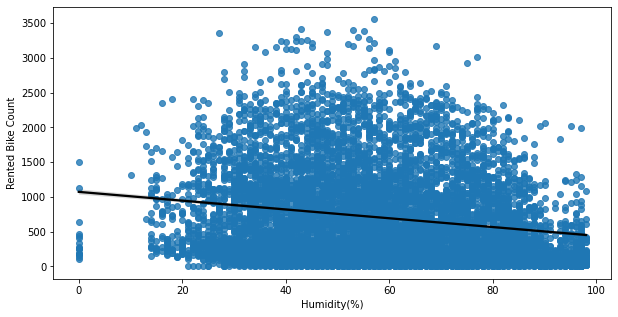

In [ ]:
#creating a regplot depicting the demand of bikes vs Humidity
plt.figure(figsize=(10,5))
sns.regplot(x = "Humidity(%)", y = "Rented Bike Count",data = df_new,line_kws={"color": "black"})

As depicted in the regplot demand of Bikes gradually decreases with the increase in Humidity,i.e There is negetive correlation.   

**Wind Speed**

In [ ]:
df_new.groupby('Wind speed (m/s)')['Rented Bike Count'].sum()

Wind speed (m/s)
0.0    33154
0.1    28961
0.2    42829
0.3    71869
0.4    87556
       ...  
6.7      146
6.9       49
7.2     1805
7.3      133
7.4      913
Name: Rented Bike Count, Length: 65, dtype: int64

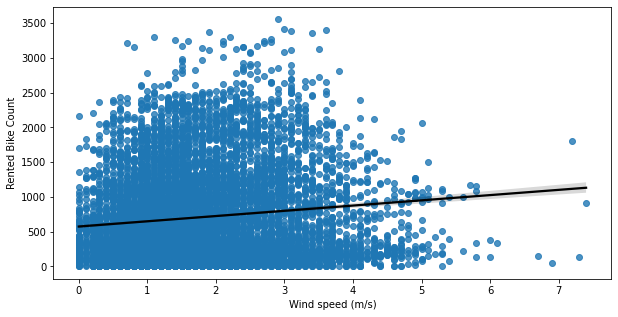

In [ ]:
#creating a regplot depicting the demand of bikes vs Windspeed
plt.figure(figsize=(10,5))
sns.regplot(x = "Wind speed (m/s)", y = "Rented Bike Count",data = df_new,line_kws={"color": "black"})

The Demand for bike gradually increases with increase in windspeed, though the change is not very high.

**Visibility**

In [ ]:
df_new.groupby('Visibility (10m)')['Rented Bike Count'].median()

Visibility (10m)
27       83.0
33       33.0
34       24.0
38       98.0
53       65.0
        ...  
1996    558.0
1997    450.5
1998    450.0
1999    408.5
2000    598.0
Name: Rented Bike Count, Length: 1789, dtype: float64

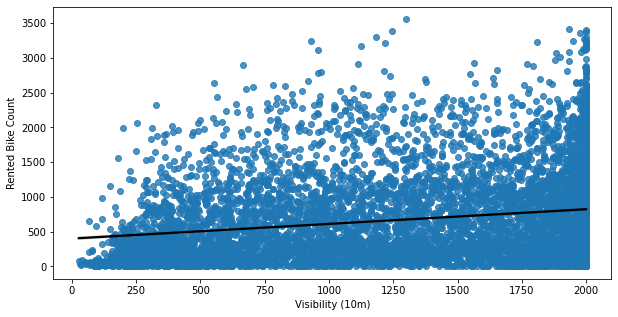

In [ ]:
#creating a regplot depicting the demand of bikes vs Visibility
plt.figure(figsize=(10,5))
sns.regplot(x = "Visibility (10m)", y = "Rented Bike Count",data = df_new,line_kws={"color": "black"})

Visibility affects demand of Bikes as low visibility makes Bike riding difficult,so demand increases with visibility 

**Dew Point Temperature**

In [ ]:
df_new.groupby('Dew point temperature(°C)')['Rented Bike Count'].sum()

Dew point temperature(°C)
-30.6      90
-30.5     192
-29.8     364
-29.7      71
-29.6     156
         ... 
 26.1    2797
 26.3     468
 26.6     309
 26.8    1522
 27.2    1117
Name: Rented Bike Count, Length: 556, dtype: int64

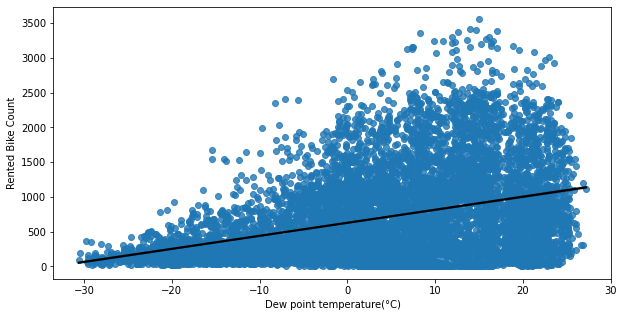

In [ ]:
#creating a regplot depicting the demand of bikes vs Dew point temperature(°C)
plt.figure(figsize=(10,5))
sns.regplot(x = "Dew point temperature(°C)", y = "Rented Bike Count",data = df_new,line_kws={"color": "black"})

The regplot seems very similar to that of Demand vs Temperature. It shows a increase in demand with an increase of dew point temperature 

**Solar Radiation**

In [ ]:
df_new.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].sum()

Solar Radiation (MJ/m2)
0.00    2094379
0.01     100481
0.02      65643
0.03      58231
0.04      36019
         ...   
3.42       5089
3.44       1216
3.45        652
3.49       1456
3.52       3032
Name: Rented Bike Count, Length: 345, dtype: int64

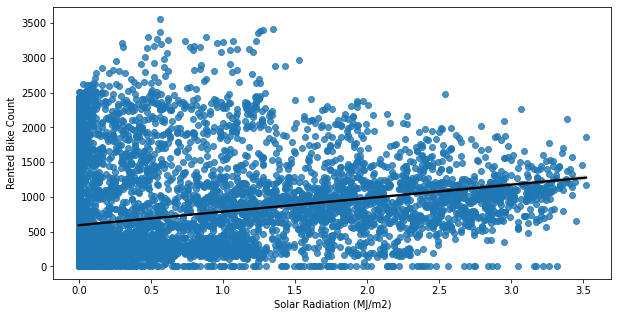

In [ ]:
#creating a regplot depicting the demand of bikes vs Solar Radiation
plt.figure(figsize=(10,5))
sns.regplot(x = "Solar Radiation (MJ/m2)", y = "Rented Bike Count",data = df_new,line_kws={"color": "black"})

Incresing Solar radiation causes gradual increase in demand of bikes as depicted in the regplot. 

**Rainfall**

In [ ]:
df_new.groupby('Rainfall(mm)')['Rented Bike Count'].sum()

Rainfall(mm)
0.0     6086009
0.1       15179
0.2        3706
0.3        1401
0.4        2147
         ...   
21.0         19
21.5        596
24.0         61
29.5        122
35.0        151
Name: Rented Bike Count, Length: 61, dtype: int64

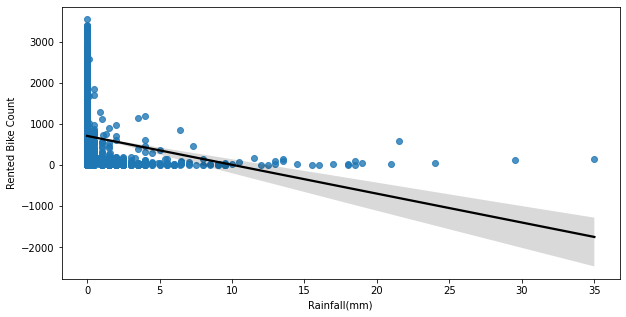

In [ ]:
#creating a regplot depicting the demand of bikes vs Rainfall
plt.figure(figsize=(10,5))
sns.regplot(x = "Rainfall(mm)", y = "Rented Bike Count",data = df_new,line_kws={"color": "black"})

Rainfall is a deciding factor while estimating Demand, as demand almost dies down when it rains.

**Snowfall**

In [ ]:
df_new.groupby('Snowfall (cm)')['Rented Bike Count'].sum()

Snowfall (cm)
0.0    6090314
0.1        205
0.2       3643
0.3       8304
0.4       5981
0.5       4716
0.6       2775
0.7       5108
0.8       5632
0.9       4854
1.0       6357
1.1       1098
1.2        435
1.3       1092
1.4        429
1.5        168
1.6       3771
1.7        754
1.8       1551
1.9        703
2.0       4191
2.1        546
2.2       3813
2.3        897
2.4        792
2.5       1980
2.6       1303
2.7       1009
2.8        355
2.9        655
3.0       1169
3.1        119
3.2       1027
3.3        841
3.4        367
3.5       1856
3.6        436
3.7        789
3.8        276
3.9         94
4.0        160
4.1        459
4.2        116
4.3         50
4.8         80
5.0        374
5.1         62
6.0        241
7.0        167
7.1         24
8.8        176
Name: Rented Bike Count, dtype: int64

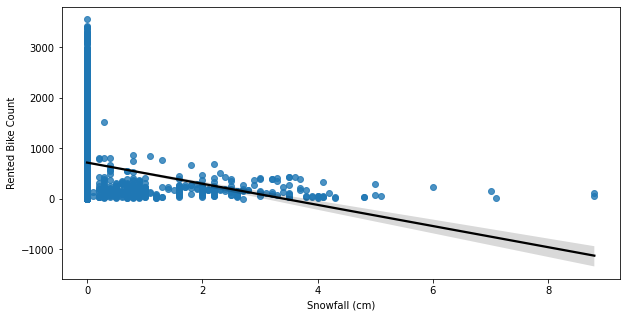

In [ ]:
#creating a regplot depicting the demand of bikes vs Rainfall
plt.figure(figsize=(10,5))
sns.regplot(x = "Snowfall (cm)", y = "Rented Bike Count",data = df_new,line_kws={"color": "black"})

Like rainfall, Snowfall also affects demands severely. Demands almost dies down when it snows.

**Seasons**

In [ ]:
#Calculating the mean bike counts in each seasons
df_new.groupby('Seasons')['Rented Bike Count'].mean()

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

Text(0, 0.5, 'Rented Bike Count')

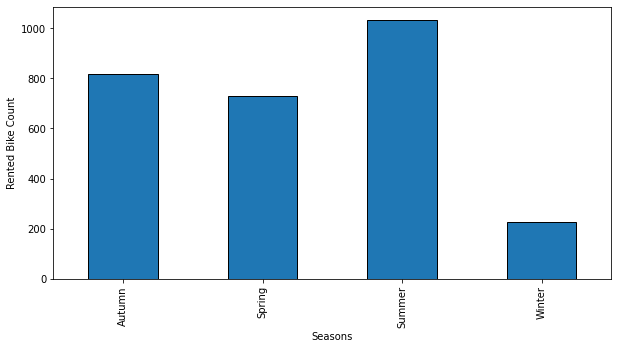

In [ ]:
#plotting the above calculated values
plt.figure(figsize=(10,5))
df_new.groupby('Seasons')['Rented Bike Count'].mean().plot.bar(edgecolor='black')
plt.ylabel('Rented Bike Count')



*   Summer has the highest demand of Bikes followed by Autumn and Spring
*   Winter sees a sharp decline of demand



**Holiday**

In [ ]:
#Calculating the bike counts on holidays and no holidays
df_new.groupby('Holiday')['Rented Bike Count'].mean()

Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64

Text(0, 0.5, 'Rented Bike Count')

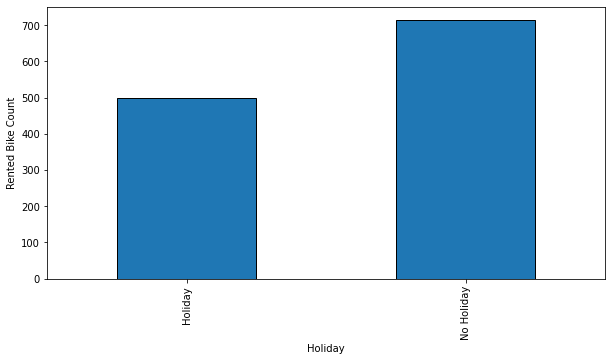

In [ ]:
#plotting the above values in a barplot
plt.figure(figsize=(10,5))
df_new.groupby('Holiday')['Rented Bike Count'].mean().plot.bar(edgecolor='black')
plt.ylabel('Rented Bike Count')

Demand of Bikes is significantly higher on No-Holidays compared to Holidays

**Day**

In [ ]:
df_new.groupby('Day')['Rented Bike Count'].sum()

Day
0    863563
1    862877
2    908871
3    928267
4    898966
5    911475
6    798295
Name: Rented Bike Count, dtype: int64

Text(0, 0.5, 'Rented Bike Count')

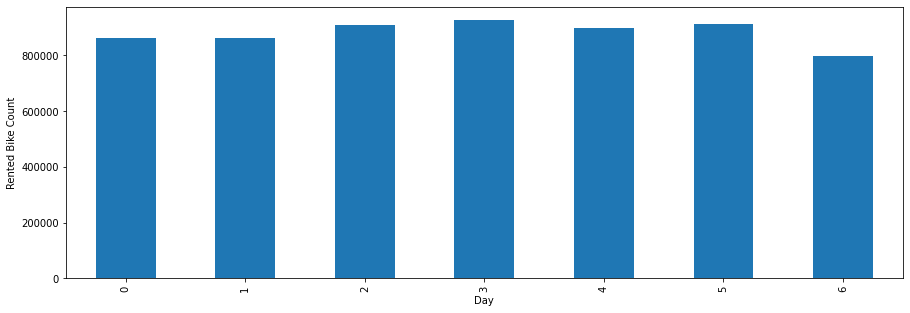

In [ ]:
plt.figure(figsize=(15,5))
df_new.groupby('Day')['Rented Bike Count'].sum().plot.bar()
plt.ylabel('Rented Bike Count')

The demand for bikes is almost uniform through out all days of the week.

Month

In [ ]:
df_new.groupby('month')['Rented Bike Count'].sum()

month
1     287244
2     264112
3     455037
4     556219
5     665948
6     706728
7     691339
8     614190
9     499326
10    626988
11    493412
12    311771
Name: Rented Bike Count, dtype: int64

Text(0, 0.5, 'Rented Bike Count')

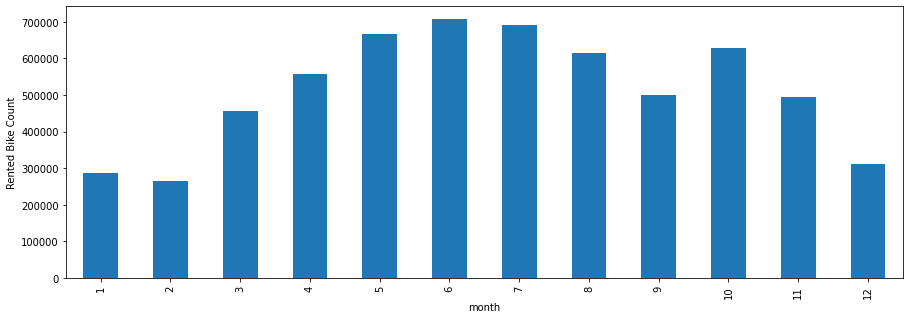

In [ ]:
plt.figure(figsize=(15,5))
df_new.groupby('month')['Rented Bike Count'].sum().plot.bar()
plt.ylabel('Rented Bike Count')

We can see that the months of May,June,July has highest Demand and months of December,January, February has lowest demand which is perfectly in sync with the barplot depicting demands on seasons which shows highest demand during Summer and lowest during Winter. 

Day of Month

In [ ]:
df_new.groupby('Day_of_month')['Rented Bike Count'].sum()

Day_of_month
1      64062
2      53694
3     117813
4     170431
5     235021
6     371295
7     272954
8     247818
9     335006
10    210966
11    161844
12     87600
13    248494
14    220070
15    209554
16    207127
17    216553
18    183589
19    211211
20    226965
21    220163
22    201731
23    190794
24    186167
25    227626
26    192598
27    219402
28    162229
29    204323
30    184774
31    130440
Name: Rented Bike Count, dtype: int64

Text(0, 0.5, 'Rented Bike Count')

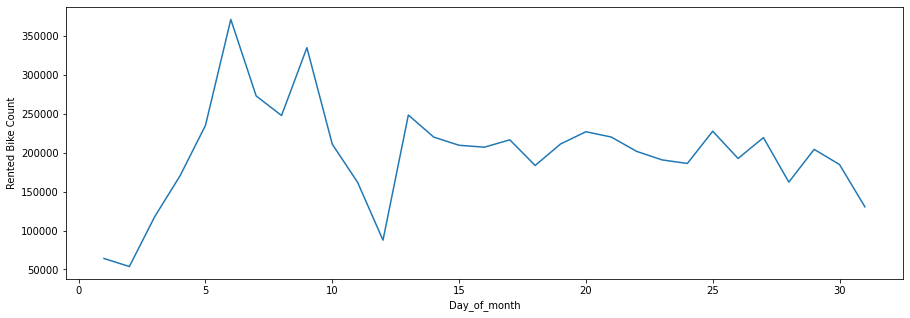

In [ ]:
plt.figure(figsize=(15,5))
df_new.groupby('Day_of_month')['Rented Bike Count'].sum().plot.line()
plt.ylabel('Rented Bike Count')

Day of Year

In [ ]:
df_new.groupby('Day_of_year')['Rented Bike Count'].sum()

Day_of_year
1       4290
2       5377
3       5132
4      17388
5      26820
       ...  
361     5351
362     6594
363     7663
364     4027
365     3423
Name: Rented Bike Count, Length: 365, dtype: int64

Text(0, 0.5, 'Rented Bike Count')

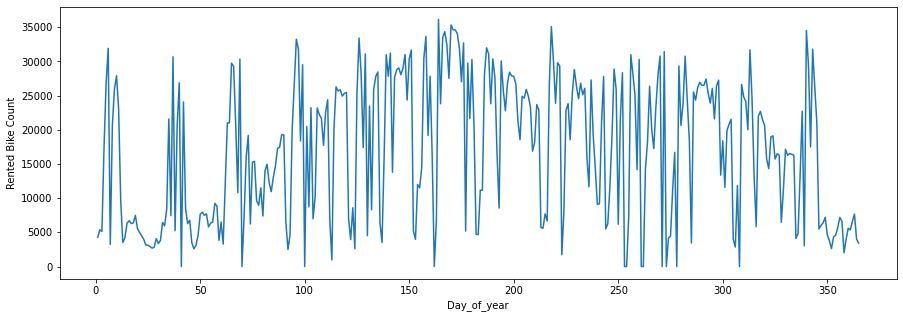

In [ ]:
plt.figure(figsize=(15,5))
df_new.groupby('Day_of_year')['Rented Bike Count'].sum().plot.line()
plt.ylabel('Rented Bike Count')

Quarter

In [ ]:
df_new.groupby('quarter')['Rented Bike Count'].sum()

quarter
1    1006393
2    1928895
3    1804855
4    1432171
Name: Rented Bike Count, dtype: int64

Text(0, 0.5, 'Rented Bike Count')

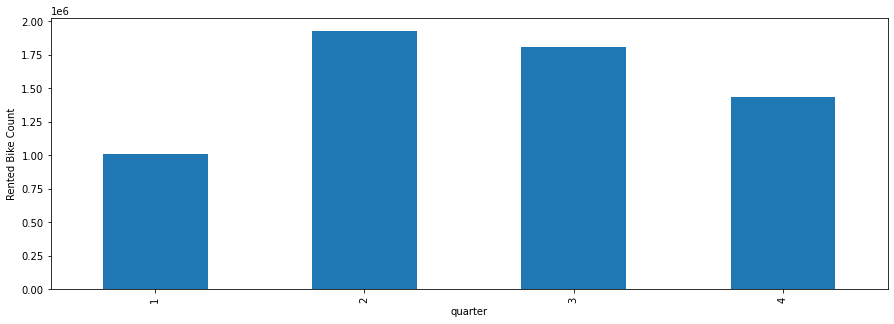

In [ ]:
plt.figure(figsize=(15,5))
df_new.groupby('quarter')['Rented Bike Count'].sum().plot.bar()
plt.ylabel('Rented Bike Count')

Heatmap

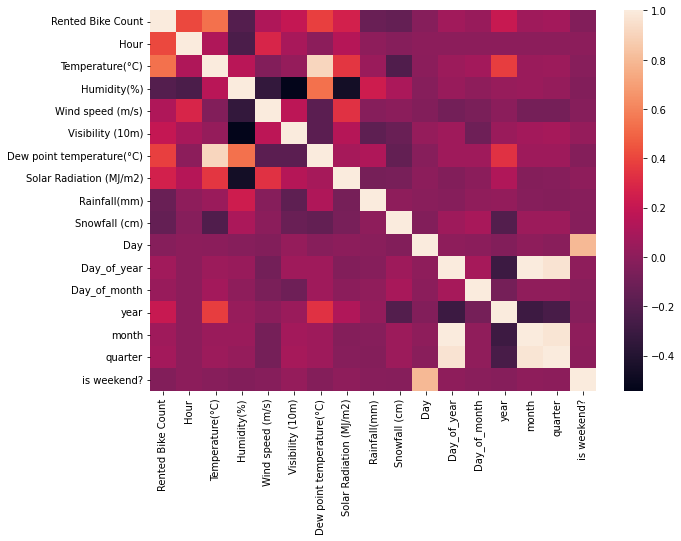

In [ ]:
plt.figure(figsize=(10,7))
Heatmap =sns.heatmap(df_new.corr())

As the heatmap suggests, temperature and dew point temperature are highly correlated.

Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df_new['Seasons']= label_encoder.fit_transform(df_new['Seasons'])
df_new['Holiday']= label_encoder.fit_transform(df_new['Holiday'])

In [ ]:
df_new= df_new.drop(['Date','Functioning Day'],axis=1)# Functioning day is just opposite of Holiday, there is no point in keepong both of them so, Functioning day is dropped
# All the information conveyed by "Date" are already covered in other features like "Year", "Month" and "Day_of_Month" so, dropping the "Date" column. 

Multi-colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#creating a function that calculates multi-colinearity
def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

VIF= calc_VIF(df_new)

In [ ]:
VIF

,variables,VIF
0,Rented Bike Count,4.294000
1,Hour,5.099954
2,Temperature(°C),192.180488
3,Humidity(%),191.128831
4,Wind speed (m/s),4.907007
...,...,...
14,Day_of_month,804.158131
15,year,2858.494630
16,month,124126.418206
17,quarter,111.458858


In [ ]:
df_new.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                        int64
Holiday                        int64
Day                            int64
Day_of_year                    int64
Day_of_month                   int64
year                           int64
month                          int64
quarter                        int64
is weekend?                    int64
dtype: object

# Machine Learning Model Implementation

**Test-Train Split**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#Defining X and y
X= df_new[['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)',"Rainfall(mm)",'Snowfall (cm)','Holiday','Day','Day_of_month','year','month','quarter']]
# Weekend is considered as Holiday so, the column "is_weekend?" is not required
y= pd.DataFrame(df_new['Rented Bike Count'])

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25, shuffle=True)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

Prediction

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
y_pred_train=reg.predict(X_train)

Text(0, 0.5, 'Predicted')

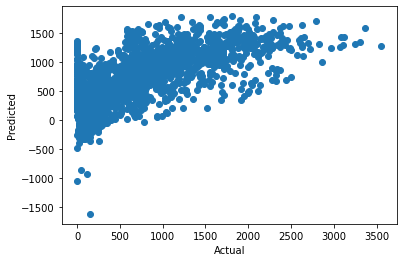

In [ ]:
#plotting the Actual and Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test['Rented Bike Count'], y_pred)

0.4695642105862745

In [ ]:
from sklearn.metrics import mean_squared_error as mse
m=mse(y_test['Rented Bike Count'], y_pred)
m

217054.8465492998

In [ ]:
rmse=np.sqrt(m)
rmse

465.8914536126412

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE  = mean_absolute_error(y_test, y_pred)
MAE

345.5150835864368

**Regularised Linear Regression**

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
#Calculating best alpha value
alphas = [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 3000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.133e+08, tolerance: 2.748e+05
  model = cd_fast.enet_coordinate_descent(


alpha:  1e-15
test Score:  0.46956421058627396
train Score:  0.4794512937362687
alpha:  1e-10
test Score:  0.46956421058630526
train Score:  0.4794512937362675
alpha:  1e-08
test Score:  0.46956421058951836
train Score:  0.4794512937362674
alpha:  1e-05
test Score:  0.4695642138328532
train Score:  0.4794512937362574
alpha:  0.0001
test Score:  0.4695642430325899
train Score:  0.47945129373503526
alpha:  0.001
test Score:  0.46956453508255536
train Score:  0.47945129361318006
alpha:  0.01
test Score:  0.4695674429371737
train Score:  0.47945128142196847
alpha:  1
test Score:  0.46977440462647324
train Score:  0.47932956386165193
alpha:  5
test Score:  0.4685991893772916
train Score:  0.4767651400919478
alpha:  10
test Score:  0.4667918632360142
train Score:  0.47377671403708754
alpha:  20
test Score:  0.46531818848125284
train Score:  0.47096240704812864
alpha:  30
test Score:  0.46153104365018394
train Score:  0.46633927359811034
alpha:  40
test Score:  0.45948447770269096
train Score

As we can see, aplha value of 1 gives best score

In [ ]:
lasso= Lasso(alpha=1, max_iter=3000)
lasso.fit(X_train, y_train)


Lasso(alpha=1, max_iter=3000)

In [ ]:
print('test Score: ',lasso.score(X_test, y_test))
print('train Score: ',lasso.score(X_train, y_train))

test Score:  0.46977440462647324
train Score:  0.47932956386165193


Test score is very close to Train score which indicates no over fitting

Prediction

In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
y_pred_train=lasso.predict(X_train)

Text(0, 0.5, 'Predicted')

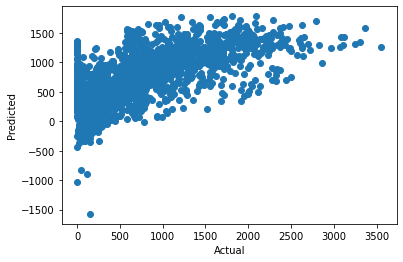

In [ ]:
#plotting the Actual and Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test['Rented Bike Count'], y_pred)

0.46977440462647324

In [ ]:
from sklearn.metrics import mean_squared_error as mse
m=mse(y_test['Rented Bike Count'], y_pred)
m

216968.83494138898

In [ ]:
rmse=np.sqrt(m)
rmse

465.799135831518

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE  = mean_absolute_error(y_test, y_pred)
MAE

345.42982491651566

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
#Finding the best parameter for Ridge Regression
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -218444.72228486234


In [ ]:
#Implementing Ridge regression on the best parameters
ridge_reg= Ridge(alpha= 20)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=20)

Prediction

In [ ]:
y_pred=ridge_reg.predict(X_test)

In [ ]:
y_pred_train= ridge_reg.predict(X_train)

Text(0, 0.5, 'Predicted')

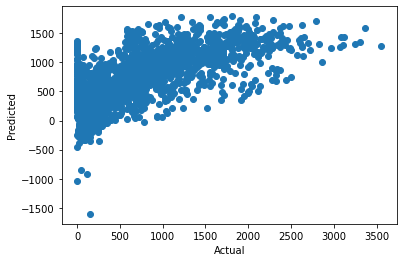

In [ ]:
#plotting the Actual and Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test['Rented Bike Count'], y_pred)

0.46962320895615695

In [ ]:
from sklearn.metrics import mean_squared_error as mse
m=mse(y_test['Rented Bike Count'], y_pred)
m

217030.70435833704

In [ ]:
rmse=np.sqrt(m)
rmse

465.865543218574

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE  = mean_absolute_error(y_test, y_pred)
MAE

345.48120066321405

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

<ipython-input-75-9059ddeff1f8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred=regr.predict(X_test)

In [ ]:
y_pred_train= regr.predict(X_train)

Text(0, 0.5, 'Predicted')

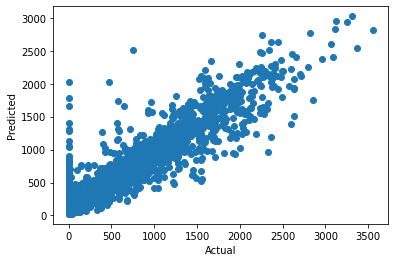

In [ ]:
#plotting the Actual and Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Feature Importance

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,'Score':regr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,Temperature(°C),0.348721
1,Hour,0.281510
2,Solar Radiation (MJ/m2),0.102970
3,Humidity(%),0.079194
4,Rainfall(mm),0.035763
...,...,...
9,Wind speed (m/s),0.023775
10,quarter,0.009091
11,Holiday,0.006032
12,year,0.002568


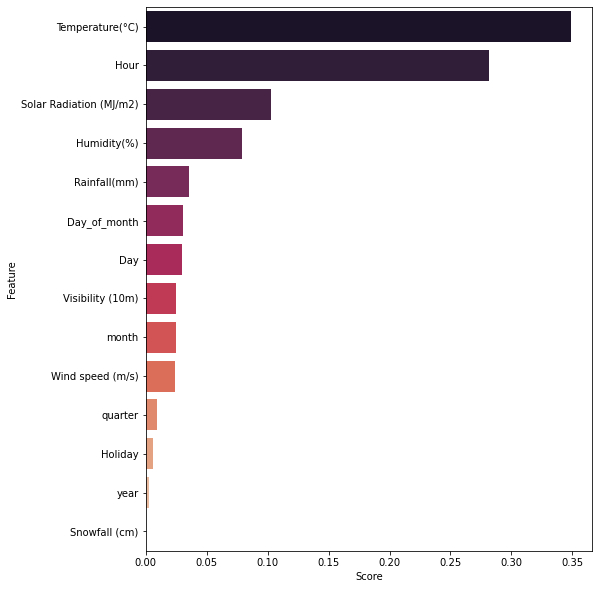

In [ ]:
#Visualisation of feature importance
plt.figure(figsize=(8,10))
sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'],palette="rocket",capsize=10)
plt.show()

Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test['Rented Bike Count'], y_pred)

0.8472101715502589

In [ ]:
from sklearn.metrics import mean_squared_error as mse
m=mse(y_test['Rented Bike Count'], y_pred)
m

62521.748023652974

In [ ]:
rmse=np.sqrt(m)
rmse

250.04349226415187

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE  = mean_absolute_error(y_test, y_pred)
MAE

144.00409132420089

Cross Validation and Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
rfc = RandomForestRegressor()

forest_params = [{'max_depth': list(range(10, 15)), 'n_estimators': list(range(100,300,50)),'min_samples_split':list(range(2,10)), 'min_samples_leaf': list(range(1,5))}]

clf = GridSearchCV(rfc, forest_params, cv = 3, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
#Implementing Random Forest Regressor with best parameters
regr = RandomForestRegressor(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
regr.fit(X_train, y_train)

<ipython-input-66-2016ae095673>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

Prediction

In [ ]:
y_pred=regr.predict(X_test)

In [ ]:
y_pred_train= regr.predict(X_train)

Text(0, 0.5, 'Predicted')

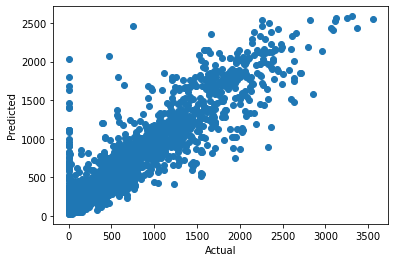

In [ ]:
#plotting the Actual and Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Model Evaluation

In [ ]:
r2_score(y_test['Rented Bike Count'], y_pred)

0.8174297544507618

In [ ]:
m=mse(y_test['Rented Bike Count'], y_pred)
m

74707.92398068999

In [ ]:
rmse=np.sqrt(m)
rmse

273.3275031545307

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE  = mean_absolute_error(y_test, y_pred)
MAE

164.5476620795153

XGBoost Regression

In [ ]:
#Calculating the best parameters
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb = xgb.XGBRegressor()
params = {'nthread':[4],"min_child_weight":[10,20],'eta': [0.004,0.04,4,40],'colsample_bytree':[0.7],'max_depth': [7,9,11],'n_estimators': [500]}
reg_gs = GridSearchCV(xgb,param_grid=params, n_jobs = 5,verbose=1,cv=3)
reg_gs.fit(X_train, y_train)
print(reg_gs.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[17:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'eta': 0.004, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 500, 'nthread': 4}


In [ ]:
#implementing XGBoost model with best parameters
from xgboost.sklearn import XGBRegressor
xgb= XGBRegressor(colsample_bytree = 0.7, eta= 0.004, max_depth= 7, min_child_weight= 10, n_estimators= 500, nthread= 4)
xgb.fit(X_train, y_train)


[18:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, eta=0.004, max_depth=7, min_child_weight=10,
             n_estimators=500, nthread=4)

Prediction

In [ ]:
y_pred=xgb.predict(X_test)

In [ ]:
y_pred_train= xgb.predict(X_train)

Text(0, 0.5, 'Predicted')

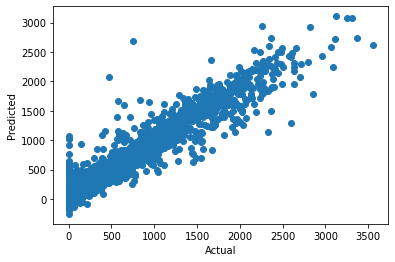

In [ ]:
#plotting the Actual and Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Feature Importance

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,'Score':regr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,Temperature(°C),0.348761
1,Hour,0.280173
2,Solar Radiation (MJ/m2),0.102287
3,Humidity(%),0.081202
4,Rainfall(mm),0.034634
...,...,...
9,Wind speed (m/s),0.022893
10,quarter,0.009571
11,Holiday,0.006386
12,year,0.002744


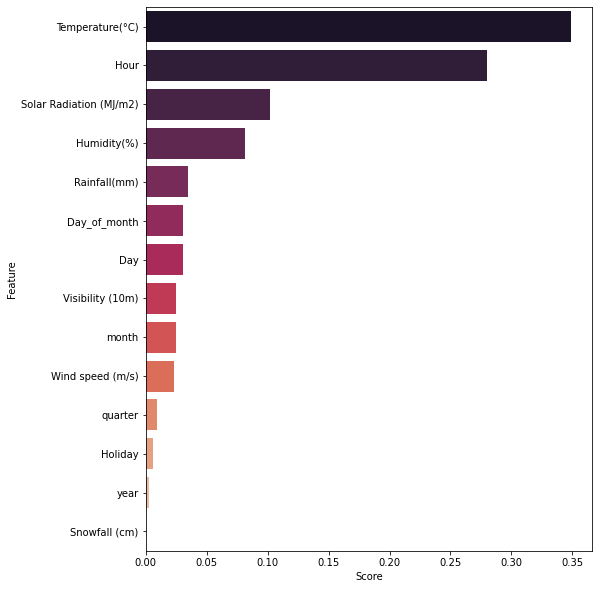

In [ ]:
#Visualisation of feature importance
plt.figure(figsize=(8,10))
sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'],palette="rocket",capsize=10)
plt.show()

Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test['Rented Bike Count'], y_pred)

0.9048080318703965

In [ ]:
from sklearn.metrics import mean_squared_error as mse
m=mse(y_test['Rented Bike Count'], y_pred)
m

38952.64695079091

In [ ]:

rmse=np.sqrt(m)
rmse

197.36424942423315

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE  = mean_absolute_error(y_test, y_pred)
MAE

118.8360704789559

# Conclusion

As we can see Hyper Parameter Tuned XGBoost ML model performs best with an accuracy of 90%. Total amount of bike rentals increases with the temperature per month. Whereas it seems that the rentals are not much affected by wind speed and humidity, because they are almost constant over the months. This also confirms on the one hand the high correlation between rentals and temperature and on the other hand that nice weather could be a good predictor.So people mainly rent bikes on nice days and optimum temperature. This could be important of planning new bike rental stations.